In [16]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def json_to_csv(filename):
    # JSON 파일 로드 (예: 'data.json'이라는 JSON 파일)
    json_filename = f"{filename}.json"
    with open(json_filename, 'r') as file:
        data = json.load(file)

    # 데이터를 저장할 리스트 초기화
    rows = []

    # JSON 데이터를 반복하며 테이블 구조로 변환
    for record in data:
        performance_id = record.get("performance_id", None)
        start_bar = record.get("start_bar", None)
        end_bar = record.get("end_bar", None)
        yhat = record.get("yhat", [])

        # yhat은 [bar1_values, bar2_values, ..., barN_values] 형태
        for bar_idx, bar_values in enumerate(yhat, start=start_bar):  # bar 시작 번호부터 반복
            for feature_idx, value in enumerate(bar_values):  # 각 feature 값
                row = {
                    "performance_id": performance_id,
                    "bar": bar_idx,
                    "feature_idx": feature_idx,
                    "value": value
                }
                rows.append(row)

    # DataFrame으로 변환
    df = pd.DataFrame(rows)

    # 결과 출력
    print(df)

    # CSV로 저장
    csv_filename = f"{filename}.csv"
    df.to_csv(csv_filename, index=False)

In [5]:
name = "concatenated_v1"
json_to_csv(name)

                                           performance_id  bar  feature_idx  \
0       MIDI-Unprocessed_082_PIANO082_MID--AUDIO-split...    0            0   
1       MIDI-Unprocessed_082_PIANO082_MID--AUDIO-split...    0            1   
2       MIDI-Unprocessed_082_PIANO082_MID--AUDIO-split...    0            2   
3       MIDI-Unprocessed_082_PIANO082_MID--AUDIO-split...    0            3   
4       MIDI-Unprocessed_082_PIANO082_MID--AUDIO-split...    0            4   
...                                                   ...  ...          ...   
195182  MIDI-Unprocessed_R1_D1-9-12_mid--AUDIO-from_mp...   78           14   
195183  MIDI-Unprocessed_R1_D1-9-12_mid--AUDIO-from_mp...   78           15   
195184  MIDI-Unprocessed_R1_D1-9-12_mid--AUDIO-from_mp...   78           16   
195185  MIDI-Unprocessed_R1_D1-9-12_mid--AUDIO-from_mp...   78           17   
195186  MIDI-Unprocessed_R1_D1-9-12_mid--AUDIO-from_mp...   78           18   

           value  
0       0.431136  
1       0.461

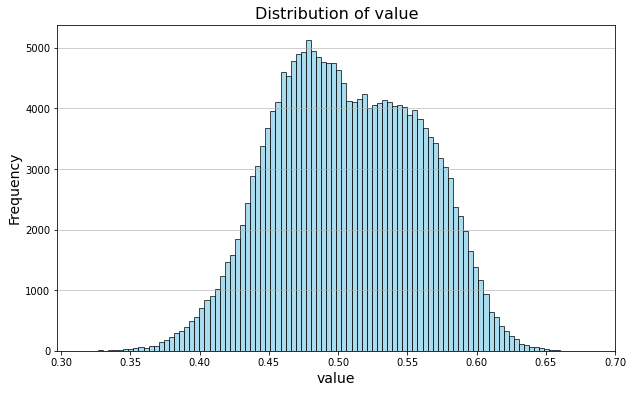

In [21]:

# CSV 파일 읽기 (예: 'data.csv')
file_path = 'concatenated_v1.csv'
df = pd.read_csv(file_path)

# 특정 열 선택 (예: 'column_name'이라는 열)
column_name = 'value'  # 분석하고 싶은 열 이름
data = df[column_name]

# 분포 그래프(히스토그램) 그리기
plt.figure(figsize=(10, 6))
plt.hist(data, bins=100, color='skyblue', edgecolor='black', alpha=0.7)

plt.title(f"Distribution of {column_name}", fontsize=16)
plt.xlabel(column_name, fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)

# 그래프 출력
plt.show()

In [31]:
# 평균과 표준편차 계산
mean = np.mean(data)
std_dev = np.std(data)

print(mean)
print(std_dev)

#임계값 설정 (k = 2, 평균 ± 2 * 표준편차)
k = 2
threshold = mean + k * std_dev

print(threshold)

q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1
l = 1
lower_threshold = q1 - l * iqr
upper_threshold = q3 + l * iqr

print(f"Lower Threshold: {lower_threshold:.2f}")
print(f"Upper Threshold: {upper_threshold:.2f}")

0.5062544728324984
0.05244026795735639
0.6111350087472112
Lower Threshold: 0.39
Upper Threshold: 0.63


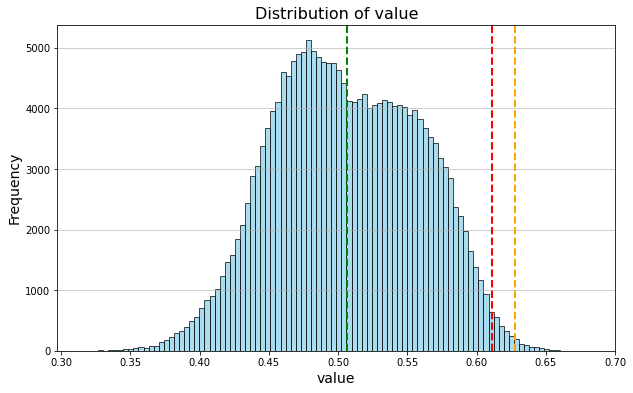

In [32]:
# 분포 그래프(히스토그램) 그리기
plt.figure(figsize=(10, 6))
plt.hist(data, bins=100, color='skyblue', edgecolor='black', alpha=0.7)

# 임계값 표시
plt.axvline(mean, color='green', linestyle='--', linewidth=2, label="Mean")
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f"std Threshold ({threshold:.2f})")
plt.axvline(upper_threshold, color='orange', linestyle='--', linewidth=2, label=f"Q3 Threshold ({upper_threshold:.2f})")

plt.title(f"Distribution of {column_name}", fontsize=16)
plt.xlabel(column_name, fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)

# 그래프 출력
plt.show()

In [33]:
# CSV 파일 읽기
file_path = 'concatenated_v1.csv'
df = pd.read_csv(file_path)

# 특정 열과 임계값 설정
column_name = 'value'  # 임계값 필터링에 사용할 열 이름
print(threshold)              # 임계값

# 임계값을 넘는 행만 필터링
filtered_df = df[df[column_name] > threshold]

# 필터링 결과 출력
print(filtered_df)

# 필터링된 결과를 새로운 CSV 파일로 저장
filtered_filename = f"filtered_{file_path}"
filtered_df.to_csv(filtered_filename, index=False)

0.6111350087472112
                                           performance_id  bar  feature_idx  \
28      MIDI-Unprocessed_082_PIANO082_MID--AUDIO-split...    1            9   
63      MIDI-Unprocessed_082_PIANO082_MID--AUDIO-split...    3            6   
291     MIDI-Unprocessed_082_PIANO082_MID--AUDIO-split...   15            6   
310     MIDI-Unprocessed_082_PIANO082_MID--AUDIO-split...   16            6   
386     MIDI-Unprocessed_082_PIANO082_MID--AUDIO-split...   20            6   
...                                                   ...  ...          ...   
193827  MIDI-Unprocessed_R1_D1-9-12_mid--AUDIO-from_mp...   22            8   
193922  MIDI-Unprocessed_R1_D1-9-12_mid--AUDIO-from_mp...   22            8   
194150  MIDI-Unprocessed_R1_D1-9-12_mid--AUDIO-from_mp...   34            8   
194188  MIDI-Unprocessed_R1_D1-9-12_mid--AUDIO-from_mp...   36            8   
194359  MIDI-Unprocessed_R1_D1-9-12_mid--AUDIO-from_mp...   45            8   

           value  
28      0.613

In [34]:
# CSV 파일 읽기
file_path = 'filtered_concatenated_v1.csv'
df = pd.read_csv(file_path)

# 특정 열 선택 (예: 'target_column')
column_name = 'feature_idx'

# 값의 빈도 계산
value_counts = df[column_name].value_counts()

# 결과 출력
print(value_counts)

6     1115
9      665
8      193
16     187
12      78
15      48
3       48
2       14
5        8
Name: feature_idx, dtype: int64
